In [1]:
import pandas as pd
import numpy as np

Load Data
---

In [2]:
energy_2018 = pd.read_csv("data/nordpool2018_clean.csv")
energy_2017 = pd.read_csv("data/nordpool2017_clean.csv")
energy_2016 = pd.read_csv("data/nordpool2016_clean.csv")

In [3]:
energy = pd.concat([energy_2017, energy_2016, energy_2018])
energy['date'] = pd.to_datetime(energy['date'])
energy = energy.sort_values(by=['date'])

energy.head()

,price,date,hour,day,month,year
23,149.13,2016-01-01,23,1,1,2016
22,153.71,2016-01-01,22,1,1,2016
0,150.41,2016-01-01,0,1,1,2016
1,147.20,2016-01-01,1,1,1,2016
2,144.45,2016-01-01,2,1,1,2016


Price Over Time
---

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

periods = [
    #(1, "hour"),
    (24, "day"),
    #(24 * 7, "week"),
    #(24 * 30, "month") 
]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

for period, name in periods:
    fig, ax = plt.subplots(1, figsize=(20, 10))
    mean = []
    std = []
    for time in list(zip(*(iter(energy['price']), ) * period)):
        mean.append(np.mean(time))
        
        #if np.std(time) != np.std(time):
         #   print(time)
        std.append(np.std(time))
    
    mean = np.array(mean)
    std = np.array(std)
    
    #mean = moving_average(mean, 200)
    
    sb.lineplot(np.arange(mean.shape[0]), mean, ax=ax)
    #ax.fill_between(np.arange(mean.shape[0]), mean + std * 1, mean - std * 1, alpha=0.3)
    ax.set_title("Price per %s" % name)
    ax.set_ylabel("Price per MW/h", fontsize=56)
    ax.set_xlabel("%s" % name, fontsize=56)
    #fig.savefig("price%d.png" % 100)

    



Price of a time
---

[301.94731751824816, 290.2715784671533, 282.70222929936307, 280.7975182481752, 285.17110401459854, 303.9726368613139, 336.0646715328467, 392.0078375912409, 422.115447080292, 415.3457299270073, 403.6309397810219, 393.75430656934304, 380.63921532846723, 372.91461678832115, 365.7055565693431, 366.2360583941606, 378.45868613138686, 405.40447992700723, 406.1586405109489, 393.593996350365, 368.05474452554745, 349.1100182481752, 331.7003649635036, 309.0354653284671]


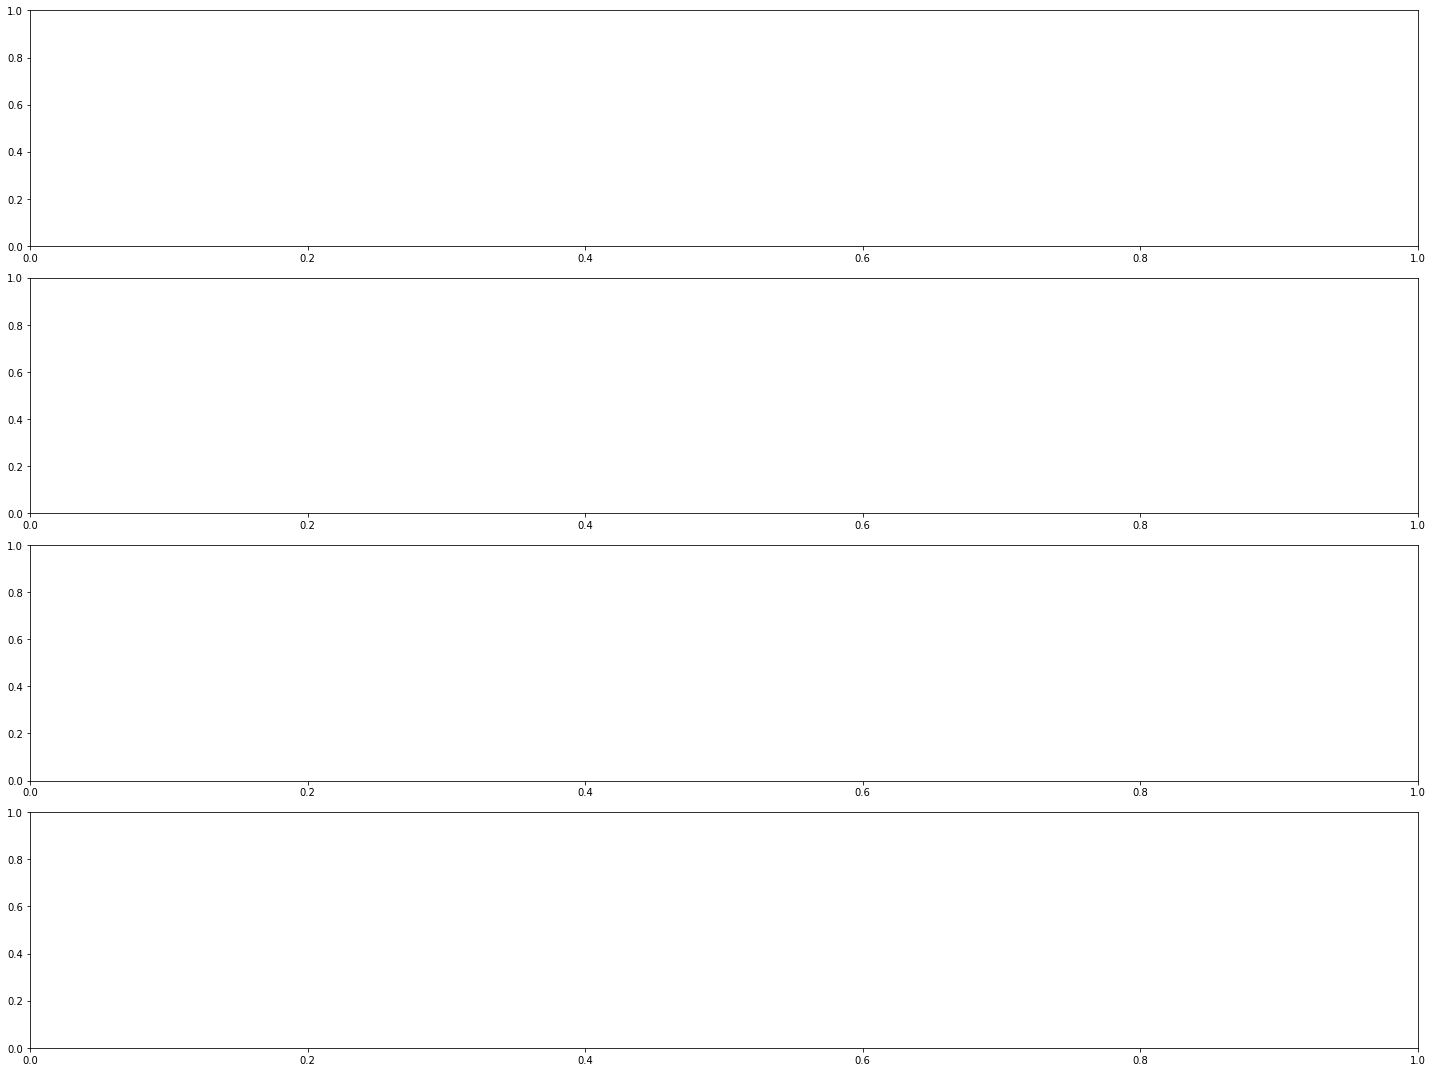

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20, 15))

mean_day = []
energy_hours = energy.groupby("hour")
for hour in energy_hours.groups:
    H = energy_hours.get_group(hour)["price"].mean()
    mean_day.append(H)


print(mean_day)
#sb.barplot(x="hour", y="price", data=energy, ci="sd", ax=ax1)
#sb.barplot(x="day", y="price", data=energy, ci="sd", ax=ax2)
#sb.barplot(x="month", y="price", data=energy, ci="sd", ax=ax3)
#sb.barplot(x="year", y="price", data=energy, ci="sd", ax=ax4)

fig.tight_layout()

Weather Data
---

In [6]:
weather = pd.read_csv("data/weather_1_clean.csv")

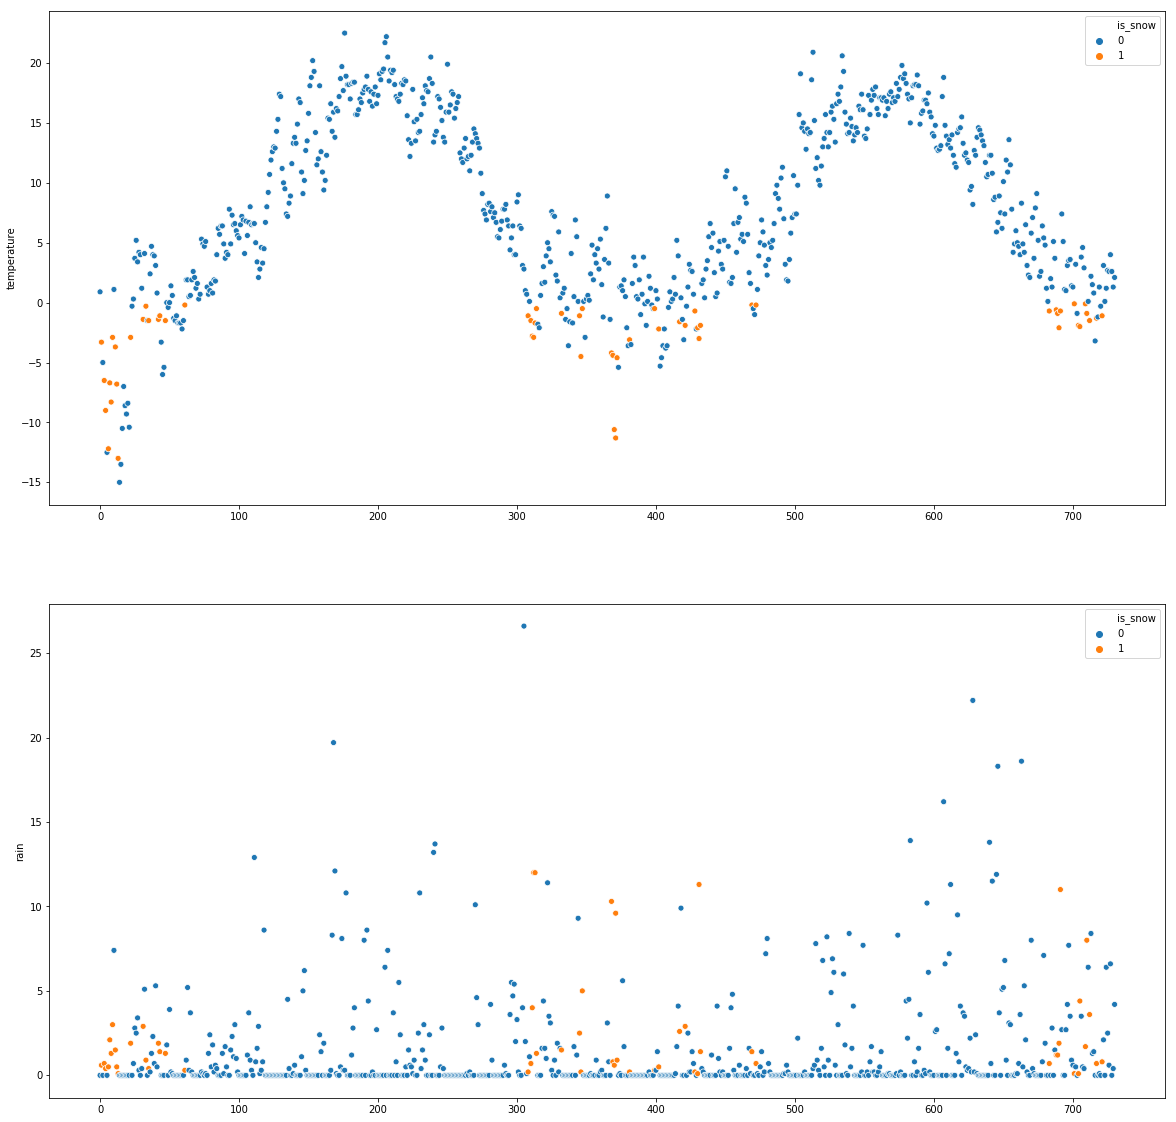

In [7]:
weather.describe()

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 20))

#hues = weather["is_snow"].apply(lambda x: x == 1  , axis=1)

sb.scatterplot(np.arange(weather["temperature"].size), weather["temperature"], hue=weather["is_snow"], ax=ax1)
sb.scatterplot(np.arange(weather["rain"].size), weather["rain"], hue=weather["is_snow"], ax=ax2)
plt.show()

Combination
---

In [8]:
weather_avg_price = weather.copy()
weather_avg_price["price"] =\
    [np.mean(price) 
     for price in list(zip(*(iter(energy['price']), ) * 24))][:731]


In [9]:
weather_norm = weather_avg_price.drop(columns="date")
weather_norm = (weather_norm - weather_norm.mean()) / weather_norm.std()

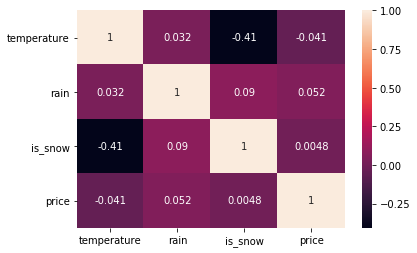

In [10]:
import seaborn as sb

sb.heatmap(weather_norm.corr(method="pearson"), annot=weather_norm.corr(method="pearson"))
plt.show()

Solution
---

TypeError: demo() got multiple values for argument 'speed'

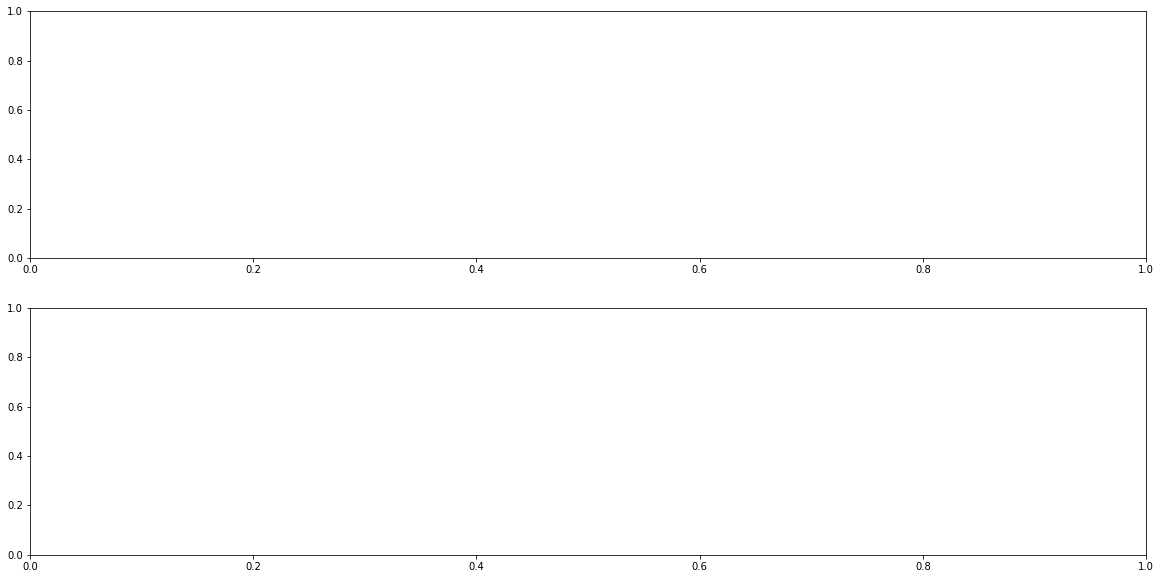

In [11]:
import api.unergygorithm as unregygorithm
import matplotlib.pyplot as plt

fig, (ax, axpdfs) = plt.subplots(2, figsize=(20, 10))


unregygorithm.demo(np.sin(np.arange(24)) + 1, fig, ax, axpdfs, speed=0.1)

In [ ]:
from IPython import display
import time

expensive_day_price = 0
expensive_day = None

for T in list(zip(*(iter(energy['price']), ) * 24)):
    if np.mean(T) > expensive_day_price:
        expensive_day_price = np.mean(T)
        expensive_day = T
        
new_year_2018 = energy[energy["date"] == "2018-01-07"]
new_year_2018.sort_values("price")
#print(new_year_2018)
#print(energy[energy["price"] > 2500])
sb.barplot(np.arange(24), expensive_day)
plt.pause(0.01)

cheap = energy[energy["price"] < 200]
cheap = cheap.sort_values("price", ascending=True)


low_dates = list(set(cheap["date"].iloc[:40]))[:5]

prices_dates = []
for date in low_dates:
    price = energy[energy["date"] == date]["price"]
    prices_dates.append((date, price))
    
cheap = energy[energy["price"] < 200]
cheap = cheap.sort_values("price", ascending=True)

expensive = energy[energy["price"] > 1000]
expensive = expensive.sort_values("price", ascending=False)

high_dates = list(set(expensive["date"].iloc[:40]))[:5]


for date in high_dates:
    price = energy[energy["date"] == date]["price"]
    prices_dates.append((date, price))



uniform = np.ones(24) * 500
fig, ax = plt.subplots(1, figsize=(20, 10))
for i, (d, p) in enumerate(prices_dates):
    ax.cla()
    display.clear_output(wait=True)


    ax.set_xlabel("Hour", fontsize=56)
    ax.set_ylim([0, 1000])
    
    pal = sb.color_palette("coolwarm_r", len(p))
    rank = p.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
    sb.barplot(np.arange(24), p, palette=np.array(pal[::-1])[rank], ax=ax)
    ax.set_ylabel("Price per MW/h", fontsize=56)

    
    fig.savefig("image_%d.png" % i)
    display.display(fig)
    
    time.sleep(0.25)

ax.cla()
display.clear_output(wait=True)
ax.set_xlabel("Hour", fontsize=56)
ax.set_ylim([0, 1000])
    
pal = sb.color_palette("coolwarm_r", len(uniform))
rank = p.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sb.barplot(np.arange(24), uniform, palette=np.array(pal[::-1])[rank], ax=ax)
ax.set_ylabel("Price per MW/h", fontsize=56)

print(uniform)
    
fig.savefig("image_%d.png" % 100)
display.display(fig)

time.sleep(0.25)